In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 

In [3]:
df = pd.read_csv("Global_Superstore2.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


## Информация о Датасете:
Global Superstore — это сеть розничных магазинов, где продают офисные и бытовые товары. В её ассортименте:

Мебель (столы, кресла, шкафы),

Техника (телефоны, гарнитуры, принтеры),

Канцелярия (бумага, ручки, картриджи).

Данные показывают, как, когда и кому эти товары продавались, под какими скидками, а также сколько магазин на этом зарабатывал или тратил на доставку.

- **Row ID** — уникальный идентификатор записи  
- **Order ID** — номер заказа  
- **Order Date** — дата оформления заказа  
- **Ship Date** — дата отправки заказа  
- **Ship Mode** — способ доставки (Standard Class, Second Class, etc.)  
- **Customer ID** — уникальный идентификатор клиента  
- **Customer Name** — имя клиента  
- **Segment** — сегмент клиента (Consumer, Corporate, Home Office)  
- **City**, **State**, **Country**, **Postal Code** — географические данные по адресу доставки  
- **Market** — региональный рынок (например, US, EU)  
- **Region** — административный регион (West, East, Central, South)  
- **Product ID** — уникальный код товара  
- **Category**, **Sub-Category** — категория и подкатегория товара  
- **Product Name** — наименование товара  
- **Sales** — выручка от продажи (в долларах)  
- **Quantity** — количество единиц в заказе  
- **Discount** — величина скидки (доля от 0 до 1)  
- **Profit** — прибыль от продажи (в долларах)  
- **Shipping Cost** — стоимость доставки (в долларах)  
- **Order Priority** — приоритет заказа (Low, Medium, High, Critical)  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

## Data Cleaning

In [6]:
#Процент нулл значений в каждом столбце
total = df.isnull().sum().sort_values(ascending=False)
percent = (total / df.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=["total", "percent"])
missing_values.head(5)

,total,percent
Postal Code,41296,0.805147
Row ID,0,0.000000
Region,0,0.000000
Shipping Cost,0,0.000000
Profit,0,0.000000


In [7]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [8]:
#Дропаем столбец Postal Code особо не несет никакой информации
df = df.drop(columns=['Postal Code'])

## Univariate Analysis

#### Немного про Univariate Analysis
Univariate analysis = фундамент понимания данных.

Цель: понять базовую структуру этой переменной.
Найти выбросы (outliers)
Странные, подозрительные значения сразу бросаются в глаза.
Понять тип данных
Категориальные (типа "Город") или количественные ("Возраст").
Понять качество данных
Есть ли пропуски, странные значения, ошибки в вводе.
Подготовить гипотезы
Например: если медиана ≠ среднее → данные могут быть скошены.
Решить, как обрабатывать столбец
Логарифмирование? Бининг (разделение на группы)?

In [9]:
#Описание численных данных
num_columns = []
for i in df.columns:
    if (df[i].dtype == "int64" or df[i].dtype == "float64") and i != "Row ID":
        num_columns.append(i)
        
df[num_columns].describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [10]:
#Описание категориальных данных
categ_columns = []
for i in df.columns:
    if df[i].dtype == "object" and i not in ["Order ID", "Customer ID", "Customer Name", "Ship Date", "Order Date", "Product ID"]:
        categ_columns.append(i)


df[categ_columns].describe()

,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,3636,1094,147,7,13,3,17,3788,4
top,Standard Class,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,Medium
freq,30775,26518,915,2001,9994,11002,11117,31273,6152,227,29433


In [11]:
#Считаем все значения по категориальным данным
for col in categ_columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- Ship Mode ---
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


--- Segment ---
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


--- City ---
City
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Vesoul              1
Várzea Grande       1
Luanshya            1
Kissimmee           1
Victoria Falls      1
Name: count, Length: 3636, dtype: int64


--- State ---
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Lambayeque               1
Aveiro                   1
Lima                     1
Medea                    1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64


--- Country ---
Country
United States    9994
Australia        2837
Fran

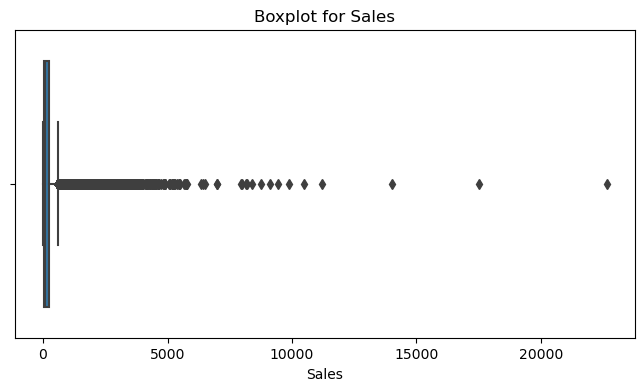

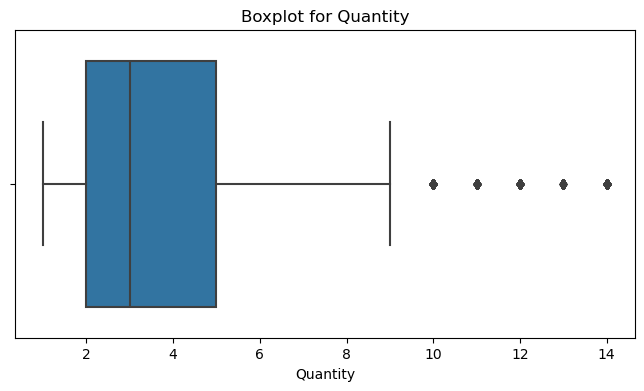

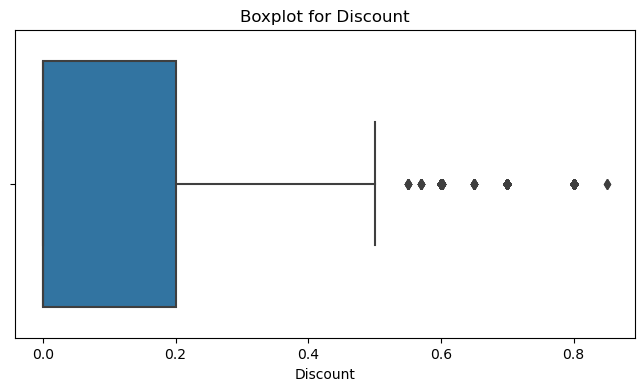

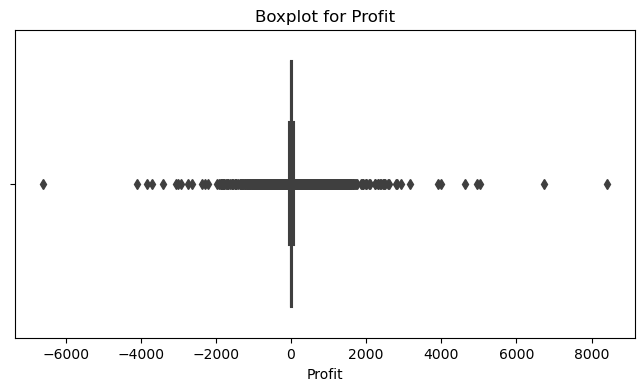

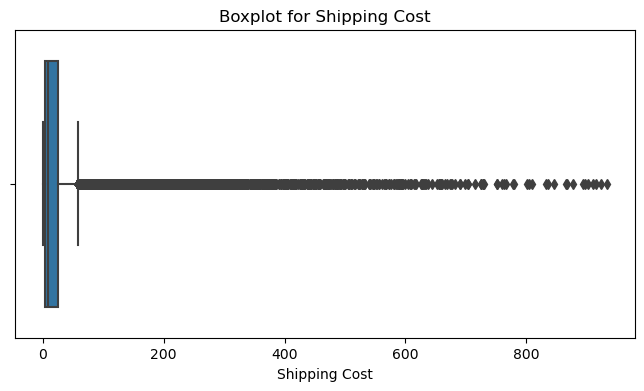

In [12]:
#Boxplot для числовых столбцов чтобы посмотреть на выбросы
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

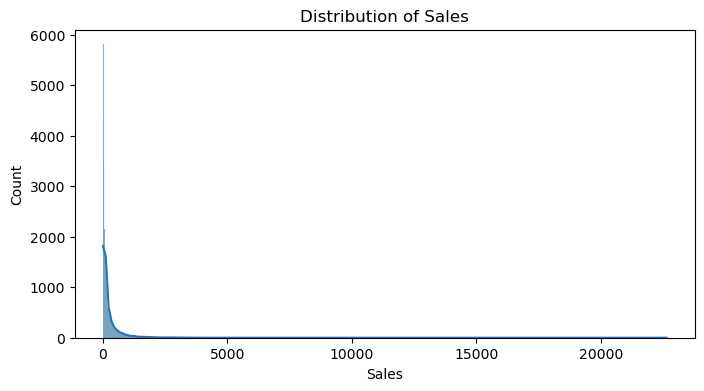

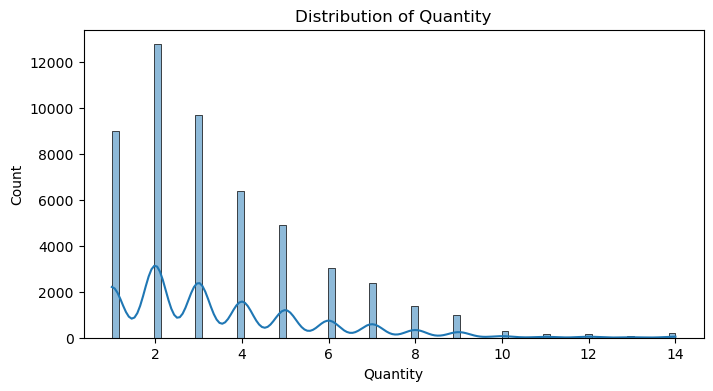

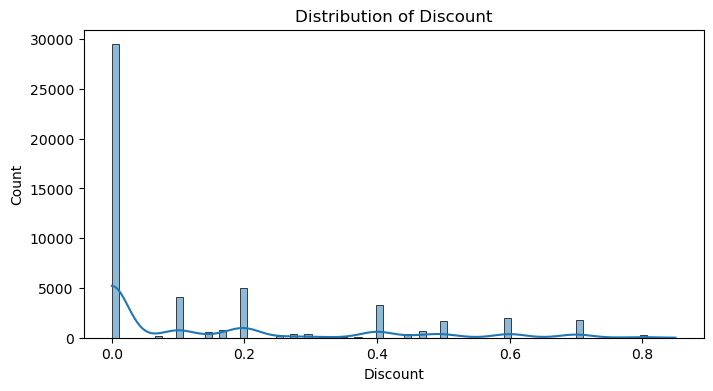

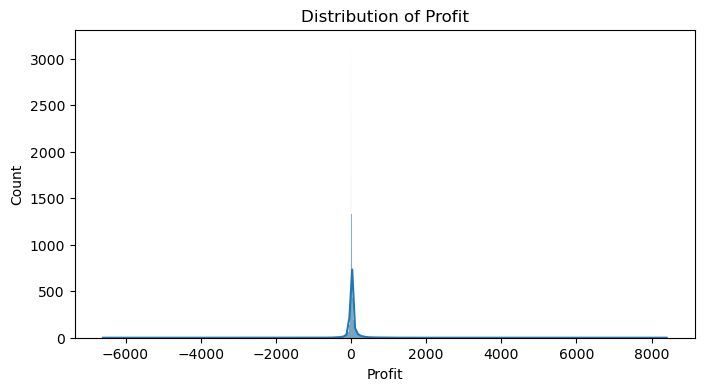

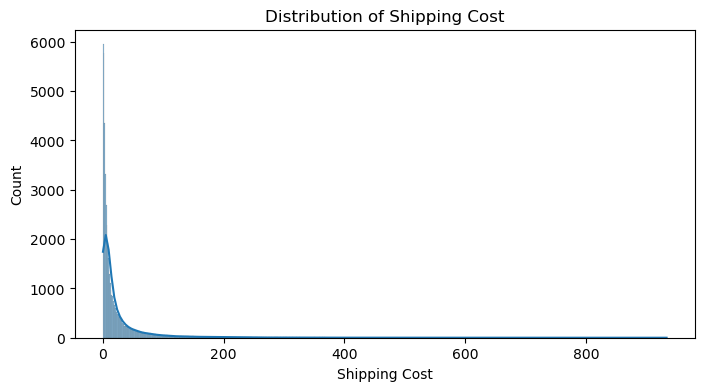

In [13]:
#Гистограмма для числовых столбцов чтобы посмотреть на распределение
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [14]:
#Считаем все значения по категориальным данным
for col in categ_columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- Ship Mode ---
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


--- Segment ---
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


--- City ---
City
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Vesoul              1
Várzea Grande       1
Luanshya            1
Kissimmee           1
Victoria Falls      1
Name: count, Length: 3636, dtype: int64


--- State ---
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Lambayeque               1
Aveiro                   1
Lima                     1
Medea                    1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64


--- Country ---
Country
United States    9994
Australia        2837
Fran

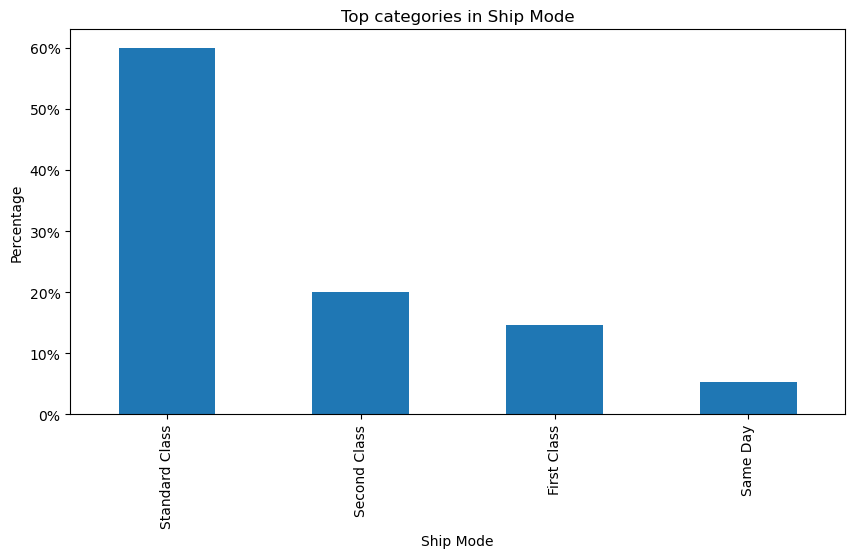

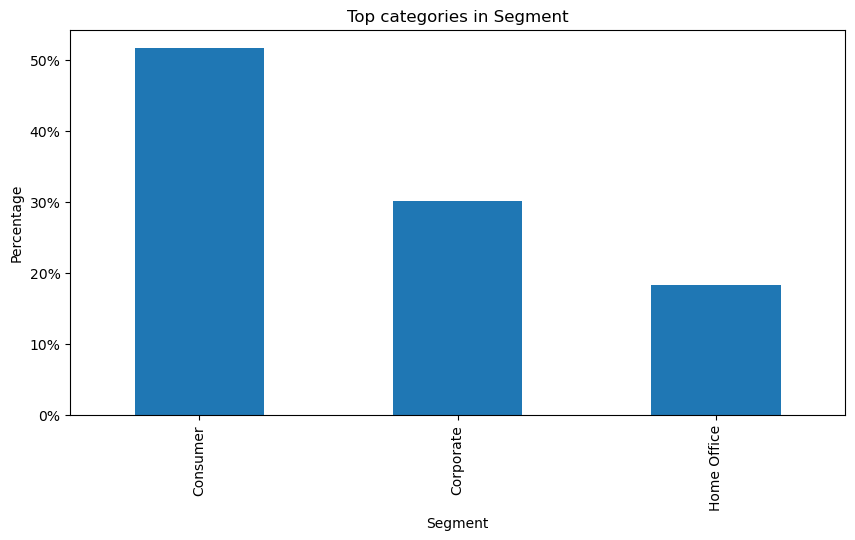

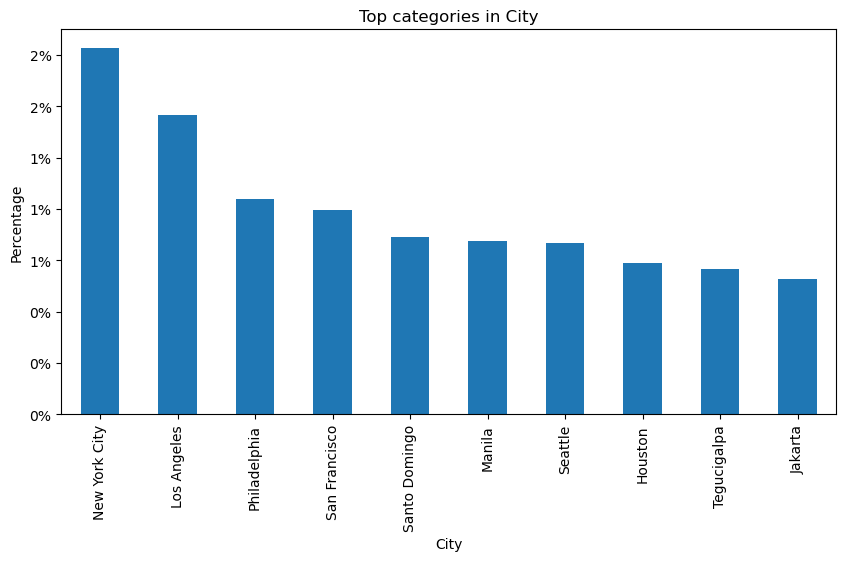

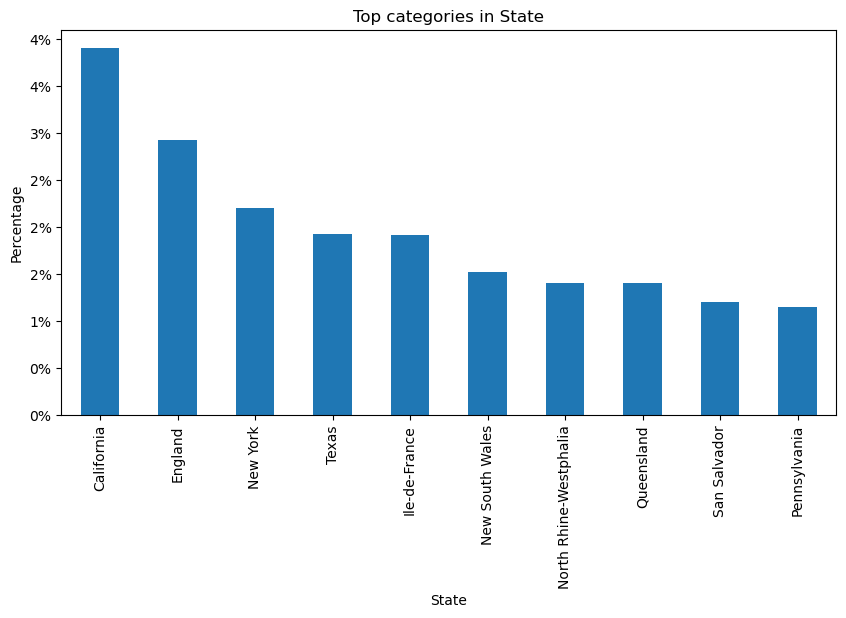

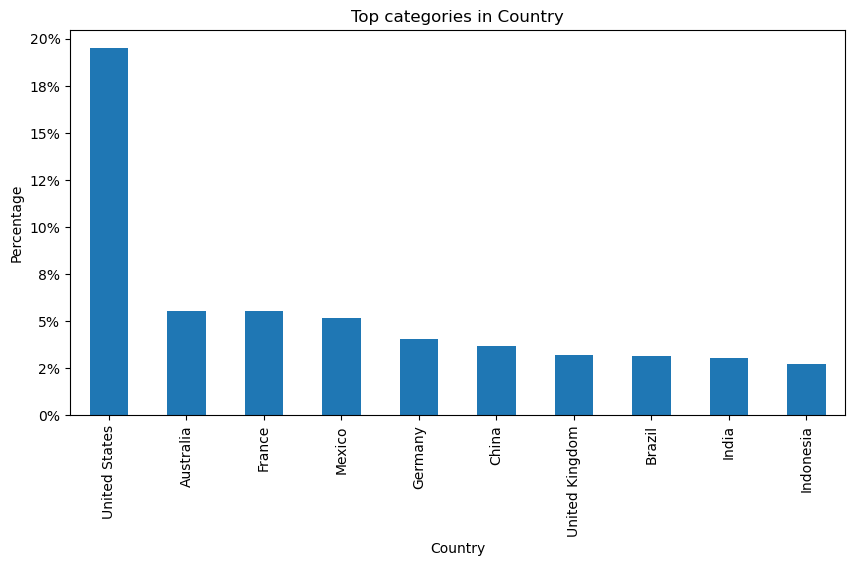

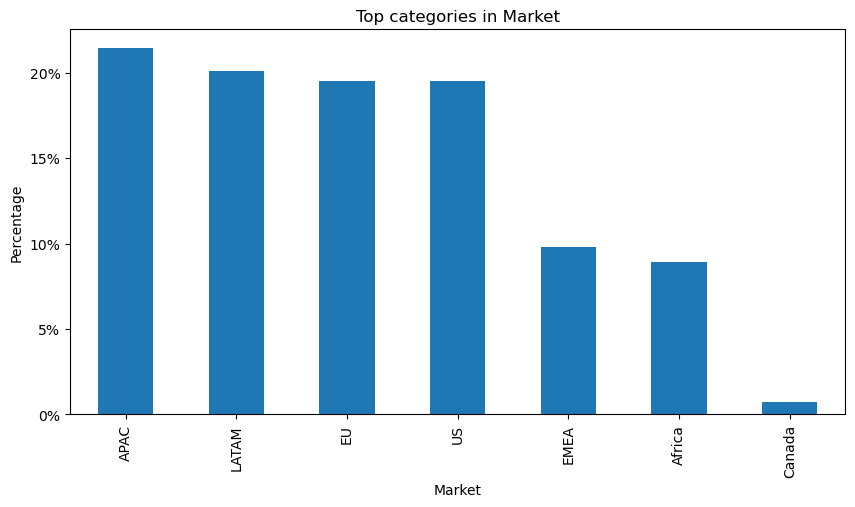

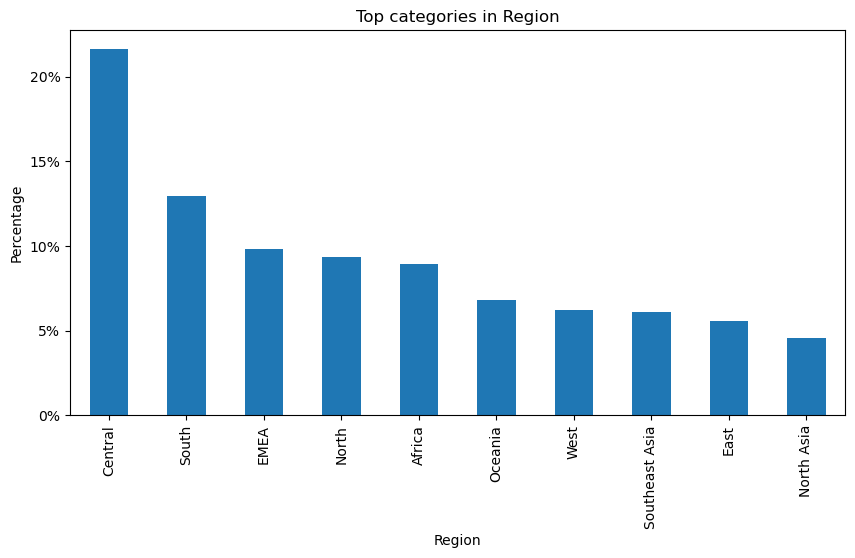

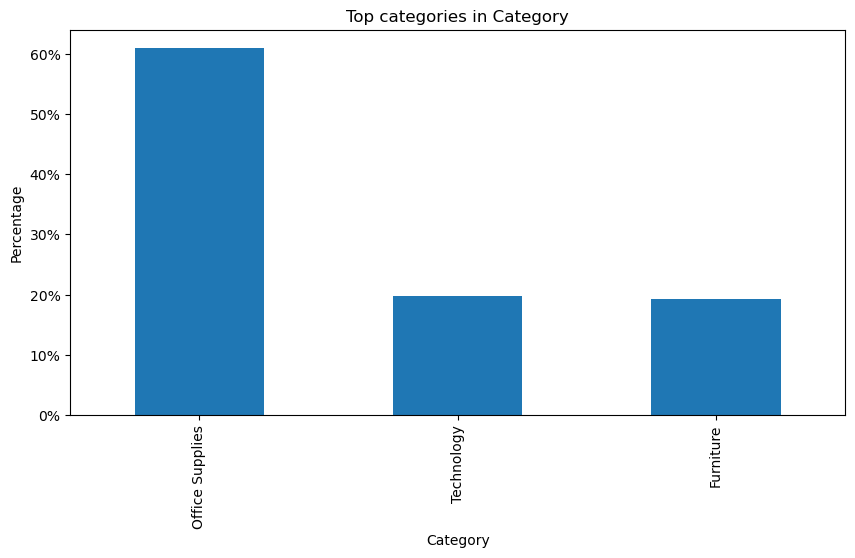

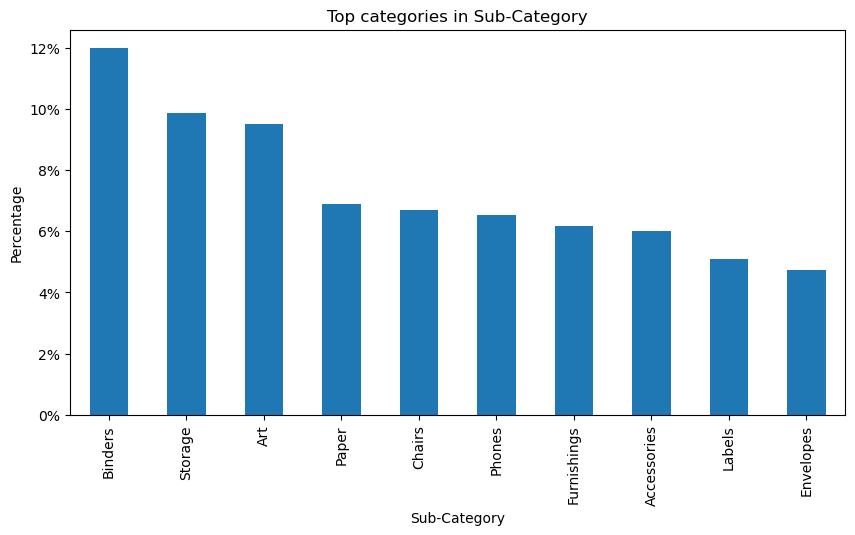

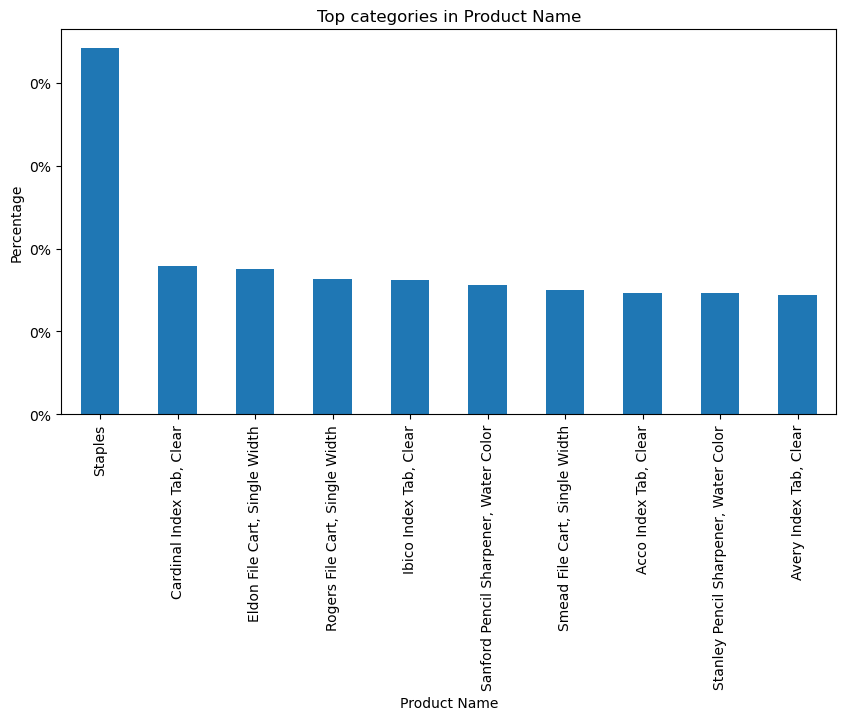

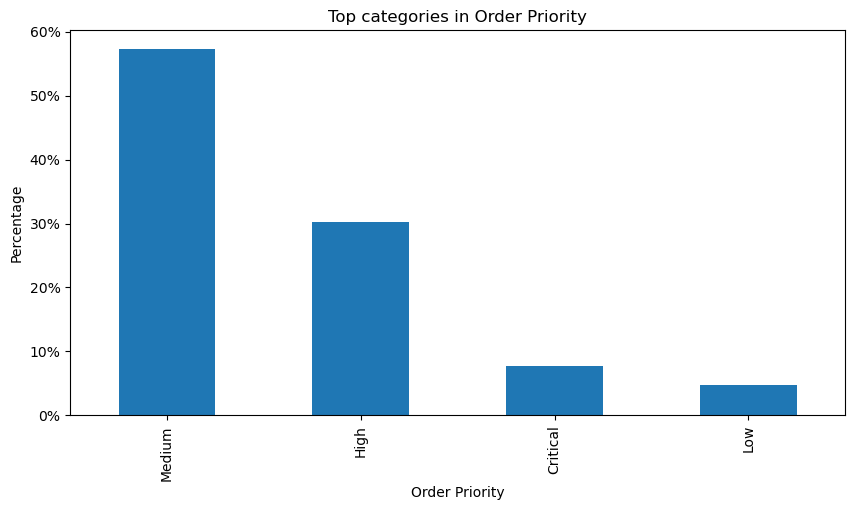

In [15]:
#Barplot для категориальных данных
for col in categ_columns:
    plt.figure(figsize=(10, 5))
    (df[col].value_counts(normalize=True).head(10) * 100).plot(kind='bar')
    plt.title(f'Top categories in {col}')
    plt.ylabel('Percentage')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    plt.show()


In [16]:
#Посмотрим на минусовые данные в Profit
df[df['Profit'] < 0].sort_values(by='Profit', ascending=True).head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
171,39069,CA-2013-108196,26-11-2013,03-12-2013,Standard Class,CS-12505,Cindy Stewart,Consumer,Lancaster,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,451.63,Low
6591,48663,TU-2013-9400,26-09-2013,26-09-2013,Same Day,DM-3345,Denise Monton,Corporate,Bornova,Izmir,...,TEC-MOT-10003050,Technology,Phones,"Motorola Smart Phone, Cordless",3085.344,12,0.6,-4088.3760,51.89,Critical
37,31980,US-2014-168116,05-11-2014,05-11-2014,Same Day,GT-14635,Grant Thornton,Corporate,Burlington,North Carolina,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,674.82,High
1341,41071,CA-2011-169019,26-07-2011,30-07-2011,Standard Class,LF-17185,Luke Foster,Consumer,San Antonio,Texas,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,172.07,Medium
2347,34308,CA-2014-134845,18-04-2014,24-04-2014,Standard Class,SR-20425,Sharelle Roach,Home Office,Louisville,Colorado,...,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800,120.31,Medium


In [17]:
#Проверяем колонки с датой чтобы не было аномальных дат
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


print(f"Order Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Ship Date range: {df['Ship Date'].min()} to {df['Ship Date'].max()}")


Order Date range: 2011-01-01 00:00:00 to 2014-12-31 00:00:00
Ship Date range: 2011-01-03 00:00:00 to 2015-01-07 00:00:00


In [18]:
#Проверка на ошибки в данных
print("Num of negative Quantity:", (df['Quantity'] < 0).sum())

print()
print("Num of rows with Discount > 1:", (df['Discount'] > 1).sum())


Num of negative Quantity: 0

Num of rows with Discount > 1: 0


In [19]:
#Находим разницу между Даты заказа и дату отправки
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Проверяем отправки до заказа
print("Ship before order:")
display(df[df['Shipping Delay'] < 0])

# Проверяем на очень долгие доставки
print("Very long shipping delay (>30 days):")
display(df[df['Shipping Delay'] > 30])

# Мгновенные доставки
print("Same day delivery but not marked as Same Day:")
display(df[(df['Shipping Delay'] == 0) & (df['Ship Mode'] != 'Same Day')])


Ship before order:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipping Delay


Very long shipping delay (>30 days):


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipping Delay


Same day delivery but not marked as Same Day:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipping Delay


In [20]:
#Skewness and kurtosis

print("Skewness:", df['Profit'].skew())
print("Kurtosis:", df['Profit'].kurt())

print()

print("Skewness:", df['Sales'].skew())
print("Kurtosis:", df['Sales'].kurt())

Skewness: 4.157188532777367
Kurtosis: 291.41108956980673

Skewness: 8.138080021220542
Kurtosis: 176.7311999336456


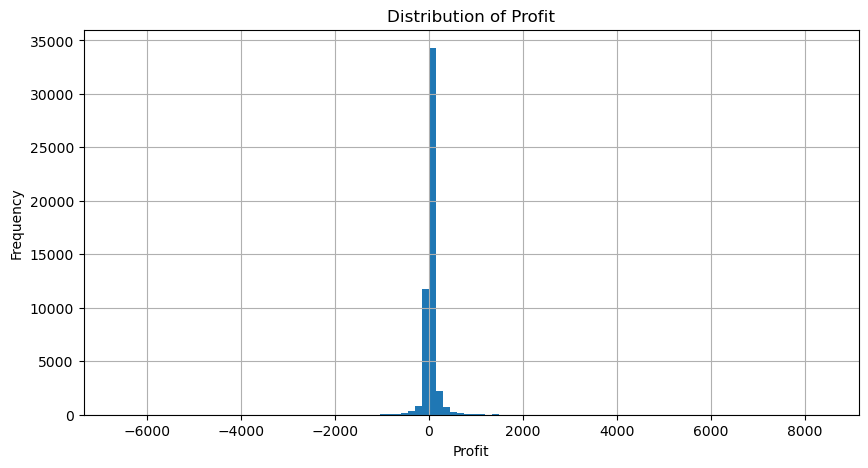

In [21]:
#Распределение колонки Profit
plt.figure(figsize=(10,5))
df['Profit'].hist(bins=100)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


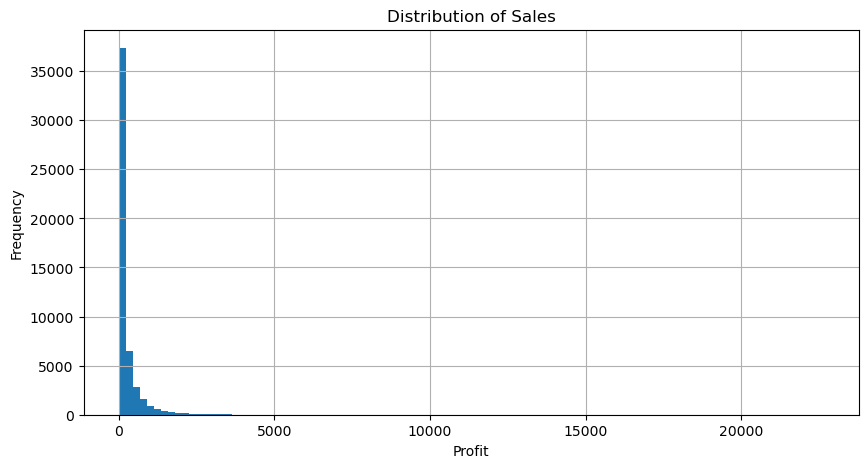

In [22]:
#Распределение колонки Sales
plt.figure(figsize=(10,5))
df['Sales'].hist(bins=100)
plt.title('Distribution of Sales')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

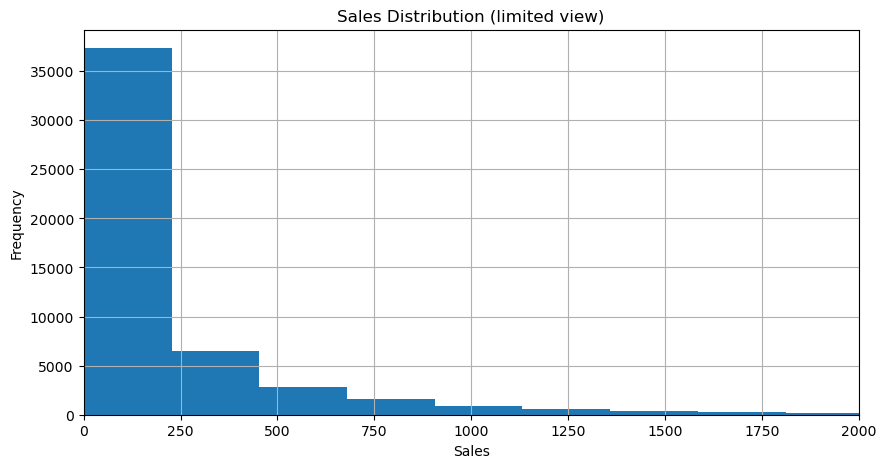

In [23]:
#Лимит по значениям по оси x чтобы увидеть распределение большинства
plt.figure(figsize=(10,5))
df['Sales'].hist(bins=100)
plt.xlim(0, 2000)  
plt.title('Sales Distribution (limited view)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


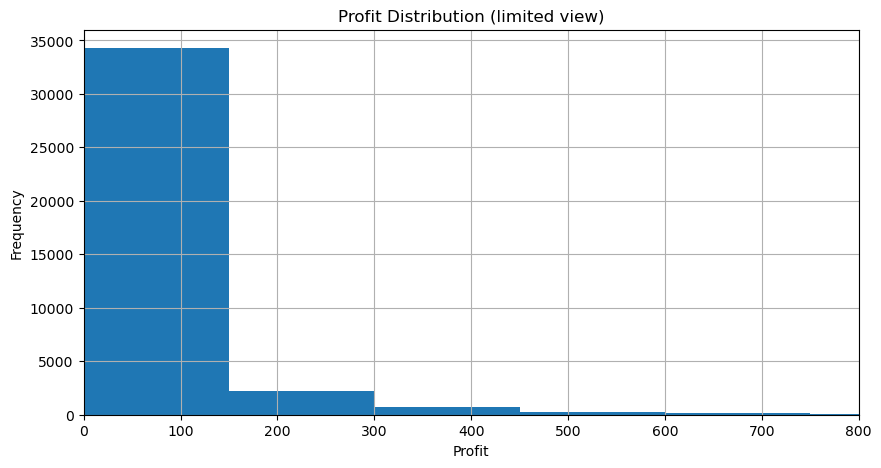

In [24]:
#Лимит по значениям по оси x чтобы увидеть распределение большинства
plt.figure(figsize=(10,5))
df['Profit'].hist(bins=100)
plt.xlim(0, 800)  
plt.title('Profit Distribution (limited view)')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


## Выводы:
### Числовые признаки:
Sales: Высокая положительная скошенность (Skewness = 8.14), сильные выбросы, большая часть продаж в небольших суммах.

Profit: Положительная скошенность (Skewness = 4.15), много заказов с маленькой прибылью, небольшое количество заказов с очень высокой прибылью или убытками.

Quantity: В основном небольшие значения (1–5 штук); выбросов нет.

Discount: В основном без скидки или скидки до 20%; нет скидок >100%.

Shipping Cost: Лёгкая скошенность вправо; большинство доставок стоит дёшево.

### Категориальные признаки:
Ship Mode: Доминирует Standard Class (~60% заказов).

Segment: Большинство клиентов — Consumer (~52%).

City, State, Country: Разброс большой, топ — США.

Category, Sub-Category: Лидируют Office Supplies и Binders.

Product Name: Очень разнообразный, явного лидера нет.

Order Priority: Чаще всего Medium приоритет.

### Ошибки:
Нет отрицательных Quantity.

Нет Discount > 1.

Даты Order Date и Ship Date нормальные.



# Bivariate Analysis

### Немного про Bivariate analysis 
Здесь мы используем две переменные и сравниваем их. Таким образом, мы можем определить, как
одна функция влияет на другую. Для этого используются точечные графики, на которых отображаются
отдельные точки данных, или корреляционные матрицы, которые отображают корреляцию в
виде оттенков. Вы также можете использовать прямоугольные графики

# 1. Discount vs Profit
   ## Оба числовые, хотим понять есть ли связь между размером скидки и прибылью?

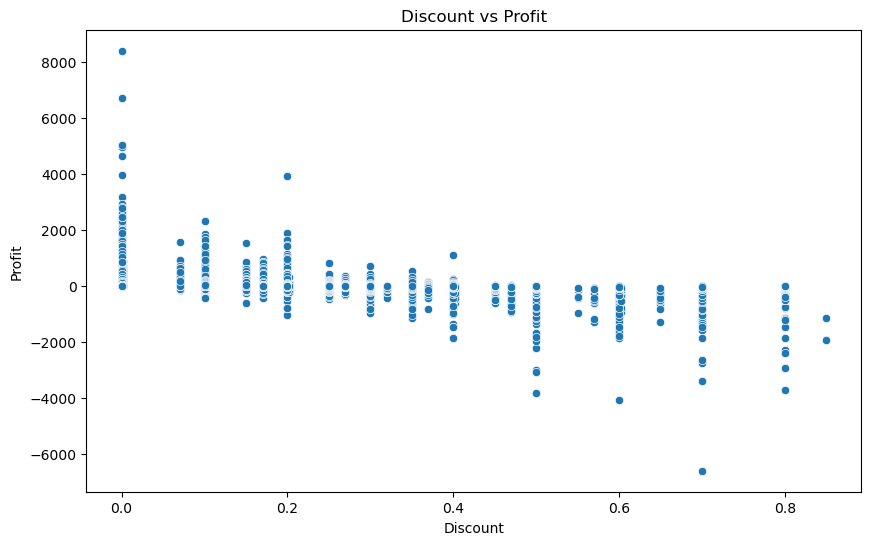

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


In [26]:
corr_discount_profit = df[['Discount', 'Profit']].corr().iloc[0, 1]
print(f"Корреляция между Discount и Profit: {corr_discount_profit:.2f}")

Корреляция между Discount и Profit: -0.32


Из анализа зависимости Discount и Profit видно умеренно отрицательную связь (корреляция = -0.32).
Это говорит о том, что увеличение скидок приводит к снижению прибыли.
При этом связь не является очень сильной: на прибыль влияют и другие факторы (например, категория товара, доставка, затраты).
Особенно заметно, что при скидках выше 20 – 50% увеличивается количество убыточных продаж.

### Дополнительная проверка чтобы доказать нашу гипотезу

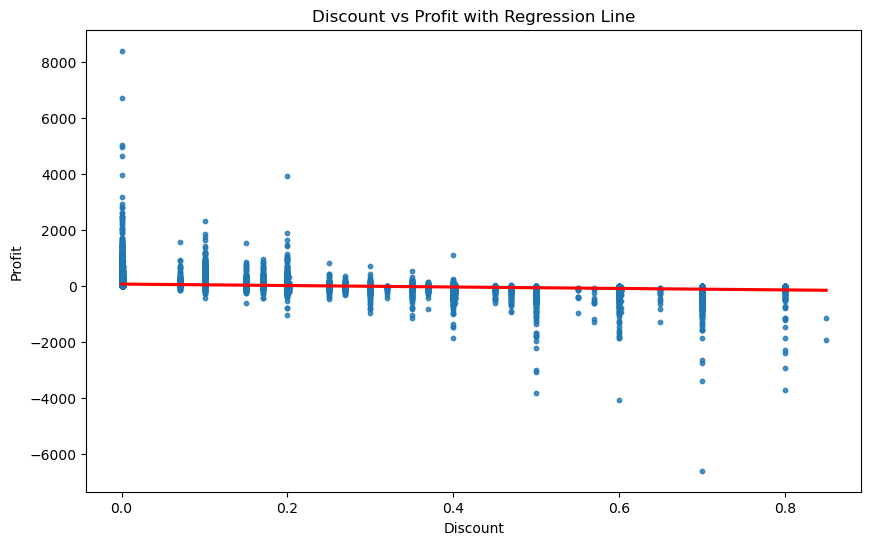

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Discount vs Profit with Regression Line')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


In [28]:
# Создаём категории скидок
discount_bins = pd.cut(df['Discount'], bins=[-0.01, 0.1, 0.2, 0.3, 0.5, 1.0], 
                       labels=["0-10%", "10-20%", "20-30%", "30-50%", "50%+"])

# Смотрим среднюю и медианную прибыль по каждой группе скидок
profit_by_discount = df.groupby(discount_bins)['Profit'].agg(['mean', 'median', 'count']).sort_index()
display(profit_by_discount)


,mean,median,count
Discount,,,
0-10%,62.600467,18.18540,33688
10-20%,27.614734,6.54625,6274
20-30%,-21.877573,-7.60500,967
30-50%,-61.551917,-16.77600,6189
50%+,-98.893015,-25.22275,4172


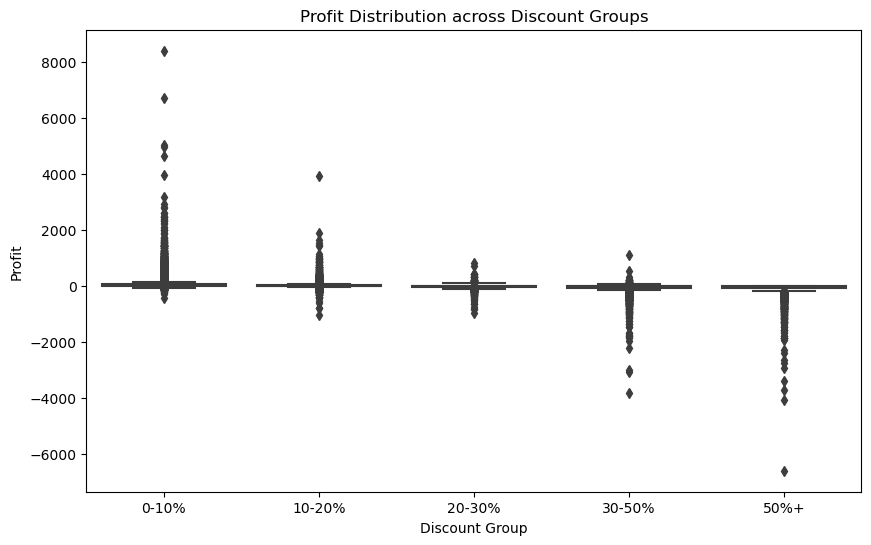

In [29]:
#Распределение Profit в разын группах скидок
plt.figure(figsize=(10,6))
sns.boxplot(x=discount_bins, y='Profit', data=df)
plt.title('Profit Distribution across Discount Groups')
plt.xlabel('Discount Group')
plt.ylabel('Profit')
plt.show()


In [30]:
# Убыточные продажи при высоких скидках
high_discount = df[df['Discount'] > 0.2]
losses = (high_discount['Profit'] < 0).sum()
total = len(high_discount)

print(f"Доля убыточных продаж при скидке > 20%: {losses / total:.2%}")


Доля убыточных продаж при скидке > 20%: 89.87%


In [31]:
# Сначала бинним Discount в группы (если ещё не сделали)
discount_bins = pd.cut(df['Discount'], bins=[-0.01, 0.1, 0.2, 0.3, 0.5, 1.0],
                       labels=["0-10%", "10-20%", "20-30%", "30-50%", "50%+"])

# Создаём новый DataFrame с группировкой
loss_rate_by_discount = df.copy()
loss_rate_by_discount['Discount Group'] = discount_bins

# Считаем долю убыточных продаж по группам
loss_summary = loss_rate_by_discount.groupby('Discount Group').apply(
    lambda g: pd.Series({
        'Total Sales': len(g),
        'Loss Sales': (g['Profit'] < 0).sum(),
        'Loss Rate (%)': round((g['Profit'] < 0).mean() * 100, 2)
    })
).reset_index()

display(loss_summary)


,Discount Group,Total Sales,Loss Sales,Loss Rate (%)
0,0-10%,33688.0,901.0,2.67
1,10-20%,6274.0,1463.0,23.32
2,20-30%,967.0,601.0,62.15
3,30-50%,6189.0,5407.0,87.36
4,50%+,4172.0,4172.0,100.00


### Окончательный вывод:
Анализ зависимости Discount и Profit показывает, что увеличение скидок оказывает значительное негативное влияние на прибыль.
При скидках свыше 20% около 90% продаж становятся убыточными.
Средняя прибыль резко падает уже при скидках выше 20%, а при скидках свыше 30% продажи становятся в основном убыточными.

## 2. Segment vs Profit
Проверяем: какой сегмент клиентов приносит больше прибыли, а какой — убыточный.

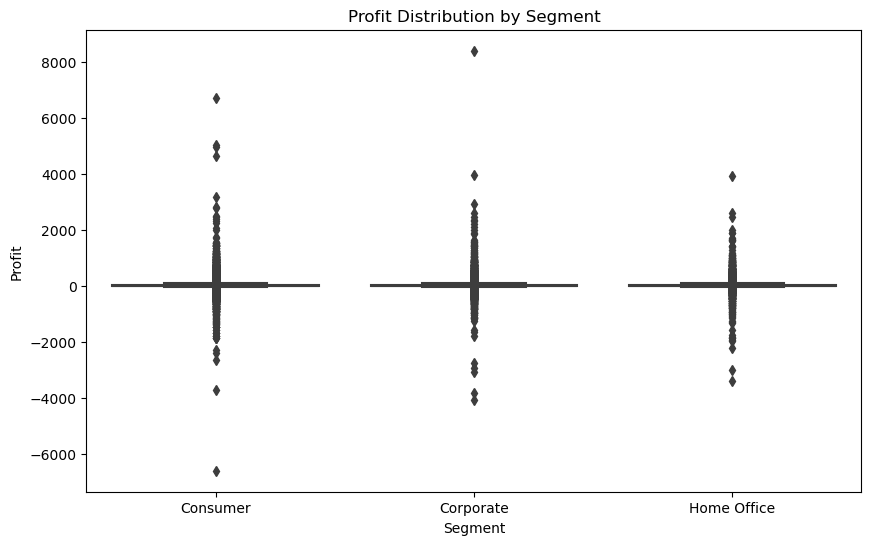

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title('Profit Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

In [33]:
profit_by_segment = df.groupby('Segment')['Profit'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
display(profit_by_segment)

,mean,median,count
Segment,,,
Home Office,29.648847,9.3200,9343
Corporate,28.596042,9.3152,15429
Consumer,28.254008,9.1800,26518


In [34]:
# Создаём новый DataFrame для расчёта
loss_rate_by_segment = df.copy()

# Считаем для каждого сегмента
loss_summary_segment = loss_rate_by_segment.groupby('Segment').apply(
    lambda g: pd.Series({
        'Total Sales': len(g),
        'Loss Sales': (g['Profit'] < 0).sum(),
        'Loss Rate (%)': round((g['Profit'] < 0).mean() * 100, 2)
    })
).reset_index()

display(loss_summary_segment)


,Segment,Total Sales,Loss Sales,Loss Rate (%)
0,Consumer,26518.0,6521.0,24.59
1,Corporate,15429.0,3771.0,24.44
2,Home Office,9343.0,2252.0,24.10


Вывод: Сегменты Consumer, Corporate и Home Office имеют схожую структуру прибыли и риск убыточных сделок (~24%). Небольшое преимущество по средней прибыли наблюдается у сегмента Home Office, однако различия между сегментами не являются значительными.


## 3.Order Priority vs Profit.
Влияет ли срочность заказа на прибыль?

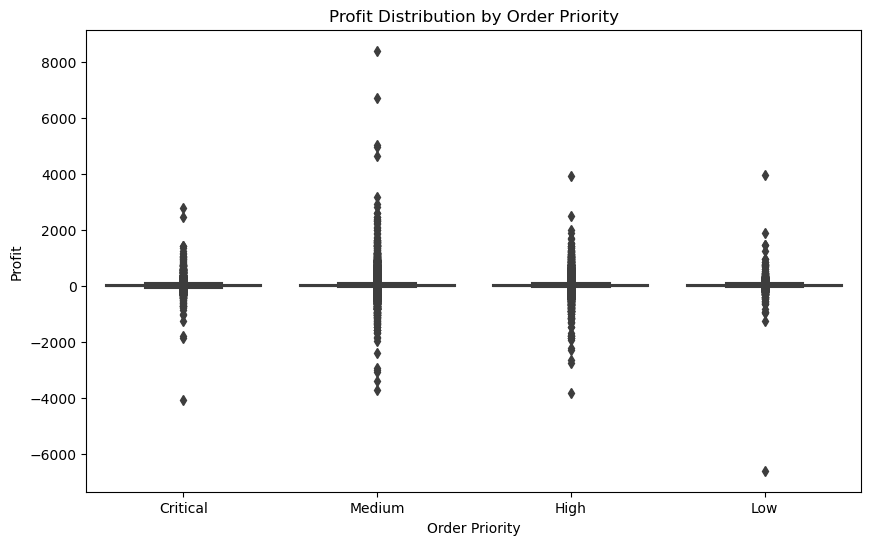

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Order Priority', y='Profit', data=df)
plt.title('Profit Distribution by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Profit')
plt.show()

In [36]:
profit_by_priority = df.groupby('Order Priority')['Profit'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
display(profit_by_priority)

,mean,median,count
Order Priority,,,
Critical,31.593124,9.7164,3932
Medium,29.361729,9.2400,29433
High,27.119122,9.1800,15501
Low,24.197958,9.0000,2424


Вывод: Более срочные заказы в среднем приносят больше прибыли, но основное распределение прибыли остаётся схожим вне зависимости от приоритета.

# Categorical Analysis

### Немного про Categorical analysis
Это исследование категориальных переменных для выявления структуры данных, доминирующих классов и возможных аномалий.

In [37]:
#Количесвто значений в каждой категориально переменной
for col in categ_columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")


--- Ship Mode ---
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


--- Segment ---
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


--- City ---
City
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Vesoul              1
Várzea Grande       1
Luanshya            1
Kissimmee           1
Victoria Falls      1
Name: count, Length: 3636, dtype: int64


--- State ---
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Lambayeque               1
Aveiro                   1
Lima                     1
Medea                    1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64


--- Country ---
Country
United States    9994
Australia        2837
Fran

In [38]:
#Подсчет редких категорий
for col in categ_columns:
    rare_cats = (df[col].value_counts(normalize=True) < 0.01).sum()
    print(f"Количество редких категорий в {col}: {rare_cats}")


Количество редких категорий в Ship Mode: 0
Количество редких категорий в Segment: 0
Количество редких категорий в City: 3633
Количество редких категорий в State: 1083
Количество редких категорий в Country: 124
Количество редких категорий в Market: 1
Количество редких категорий в Region: 1
Количество редких категорий в Category: 0
Количество редких категорий в Sub-Category: 0
Количество редких категорий в Product Name: 3788
Количество редких категорий в Order Priority: 0


In [39]:
#Процент значений по столбцам Region, Market
display(df['Region'].value_counts(normalize=True)) 

print()
display(df['Market'].value_counts(normalize=True)) 

Region
Central           0.216748
South             0.129557
EMEA              0.098050
North             0.093293
Africa            0.089433
Oceania           0.067986
West              0.062449
Southeast Asia    0.061006
East              0.055527
North Asia        0.045584
Central Asia      0.039930
Caribbean         0.032950
Canada            0.007487
Name: proportion, dtype: float64

Market
APAC      0.214506
LATAM     0.200702
EU        0.194970
US        0.194853
EMEA      0.098050
Africa    0.089433
Canada    0.007487
Name: proportion, dtype: float64

In [40]:
#Топ-3 катеогрии по каждому столбцу
for col in categ_columns:
    top3_share = df[col].value_counts(normalize=True).head(3).sum() * 100
    print(f"Топ-3 категории в {col} занимают {top3_share:.2f}% всех данных")


Топ-3 категории в Ship Mode занимают 94.73% всех данных
Топ-3 категории в Segment занимают 100.00% всех данных
Топ-3 категории в City занимают 4.29% всех данных
Топ-3 категории в State занимают 9.02% всех данных
Топ-3 категории в Country занимают 30.53% всех данных
Топ-3 категории в Market занимают 61.02% всех данных
Топ-3 категории в Region занимают 44.44% всех данных
Топ-3 категории в Category занимают 100.00% всех данных
Топ-3 категории в Sub-Category занимают 31.38% всех данных
Топ-3 категории в Product Name занимают 0.80% всех данных
Топ-3 категории в Order Priority занимают 95.27% всех данных


Вывод:Анализ категориальных переменных показал, что основные признаки (Ship Mode, Segment, Category, Order Priority) имеют сбалансированное распределение без сильного перекоса.
Высокая уникальность наблюдается в признаках City, State и Product Name, что является ожидаемым для адресных и товарных данных.
Редких категорий среди ключевых бизнес-признаков практически нет, что подтверждает высокое качество категориальных данных для дальнейшего анализа.

## Time Series Analysis

Немного про Time Series Analysis: анализ данных по времени: тренды, сезонность, изменения со временем.


In [41]:
print(f"Order Date range: {df['Order Date'].min()} to {df['Order Date'].max()}")

Order Date range: 2011-01-01 00:00:00 to 2014-12-31 00:00:00


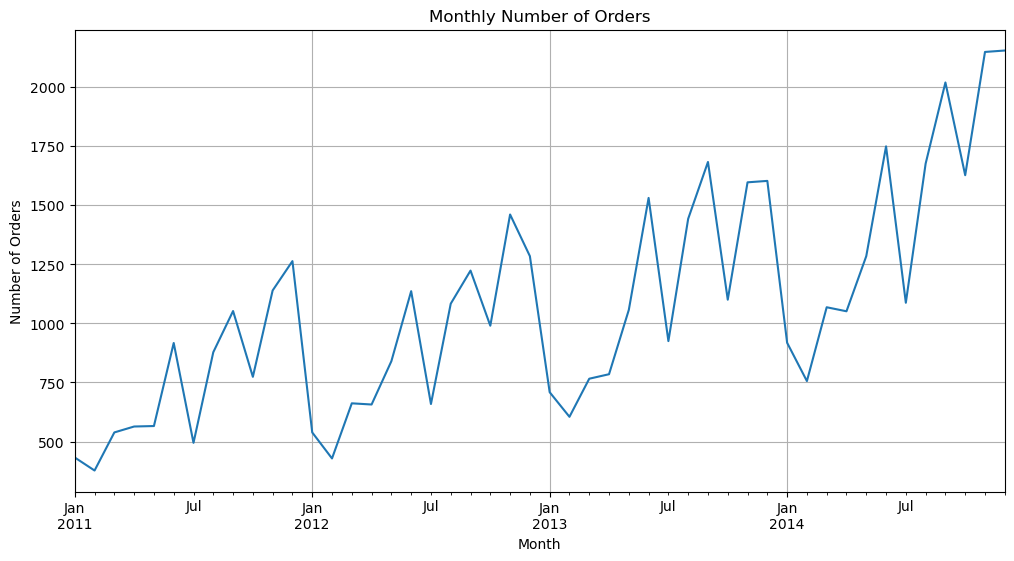

In [42]:
# Группируем по месяцу
df.set_index('Order Date', inplace=True)
monthly_orders = df.resample('M').size()

plt.figure(figsize=(12,6))
monthly_orders.plot()
plt.title('Monthly Number of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


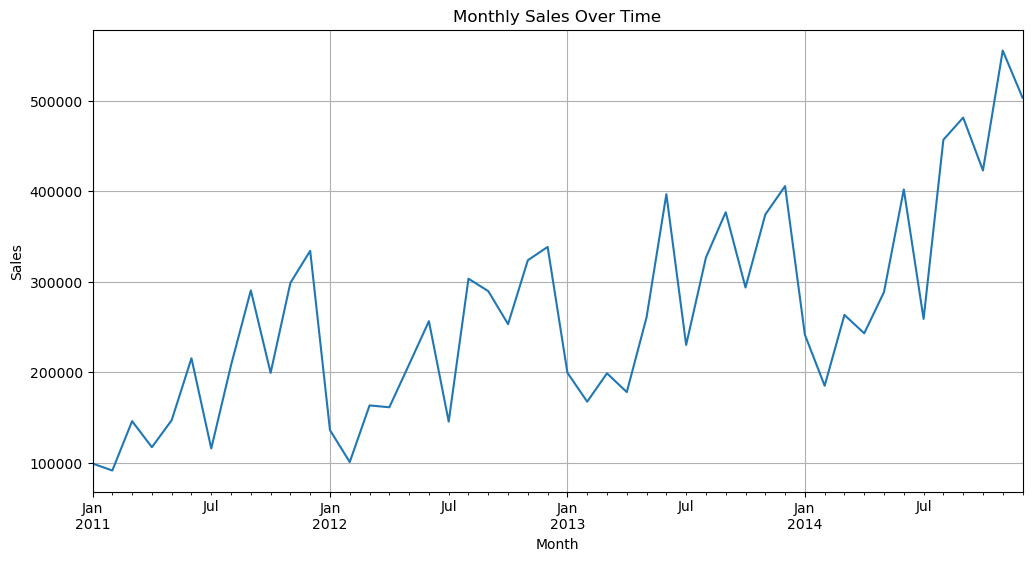

In [43]:
# Группируем продажи по месяцу
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


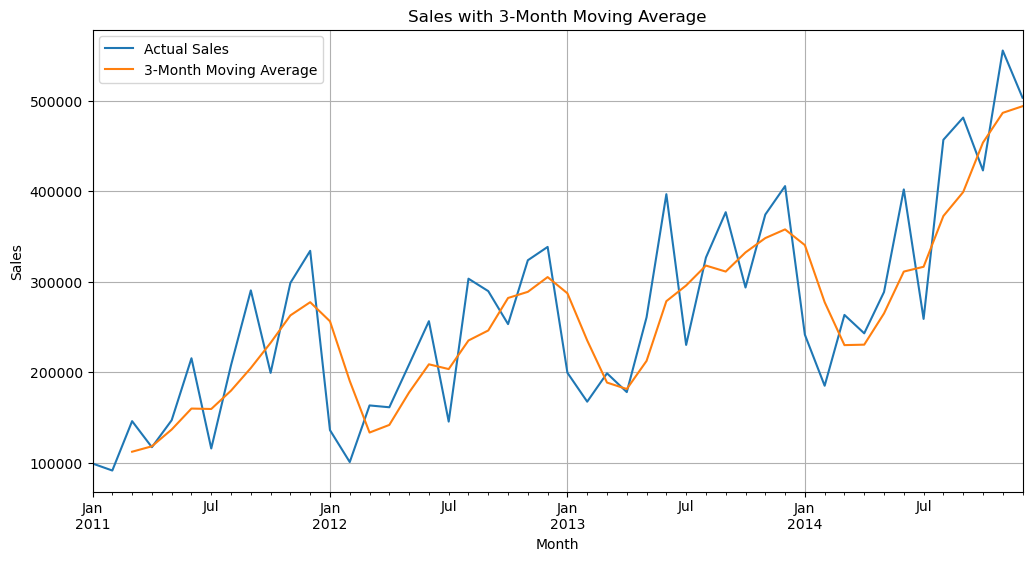

In [44]:
# Скользящее среднее на 3 месяца
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12,6))
monthly_sales.plot(label='Actual Sales')
monthly_sales_rolling.plot(label='3-Month Moving Average')
plt.title('Sales with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


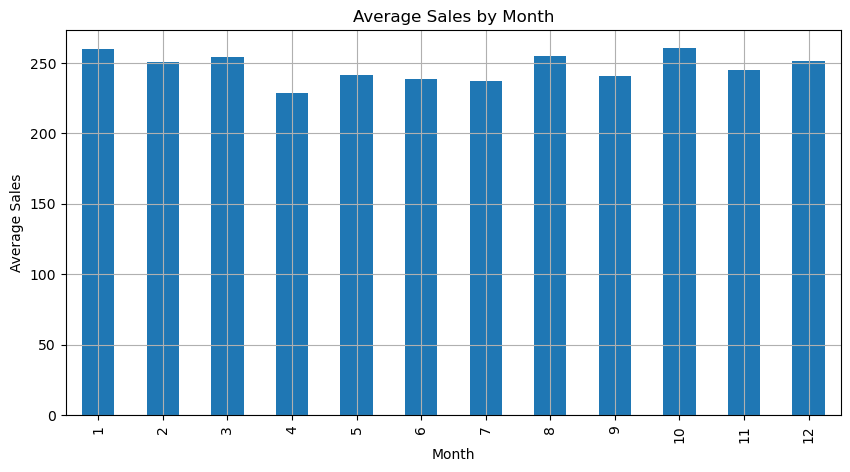

In [45]:
# Добавляем отдельную колонку "Месяц"
df['Month'] = df.index.month

# Средние продажи по каждому месяцу
monthly_avg_sales = df.groupby('Month')['Sales'].mean()

plt.figure(figsize=(10,5))
monthly_avg_sales.plot(kind='bar')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


Time Series Analysis показал стабильный рост заказов и выручки с 2011 по 2014 годы, а также выявил сезонные пики продаж в январе и октябре. Тренд устойчиво восходящий как по количеству заказов, так и по суммарной выручке.

# Geographical Analysis


Geographical Analysis — это анализ данных по географическим признакам.Цель — понять географические различия в поведении клиентов и результатах продаж.



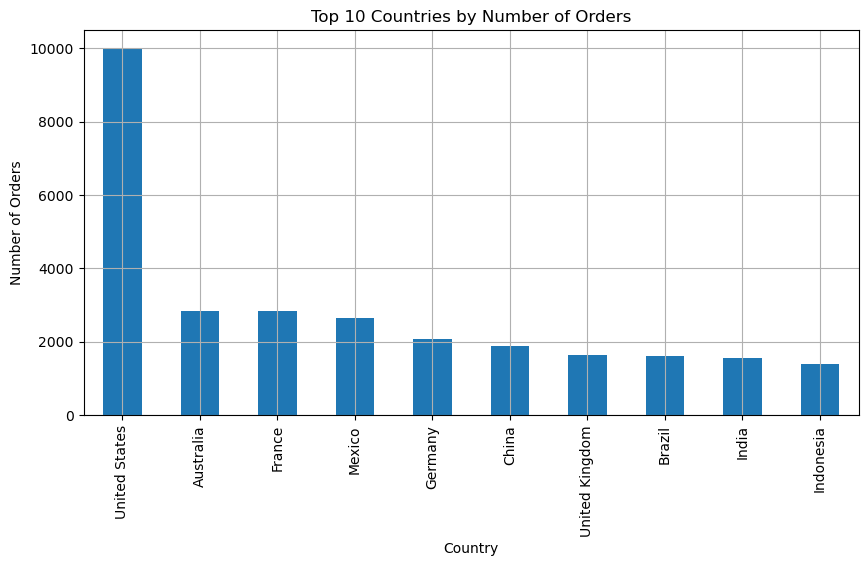

In [47]:
top_countries_orders = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries_orders.plot(kind='bar')
plt.title('Top 10 Countries by Number of Orders')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


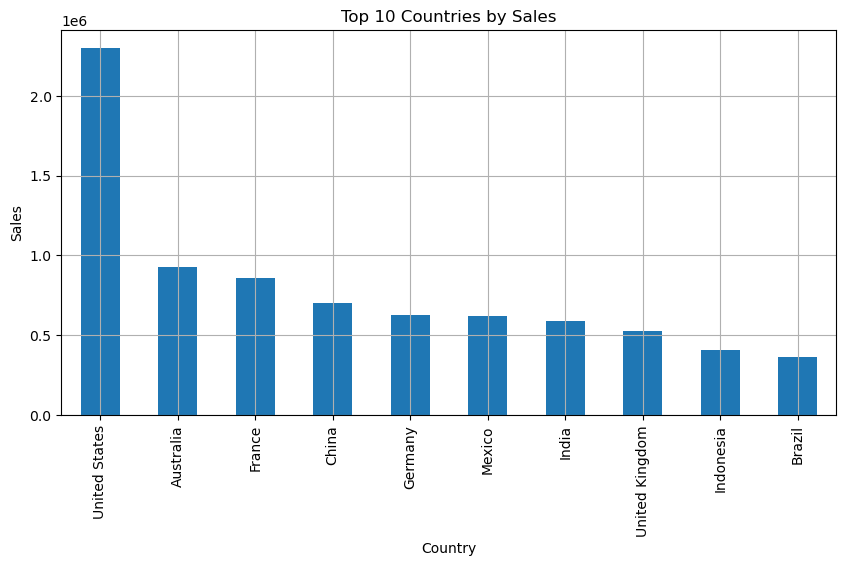

In [48]:
top_countries_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries_sales.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


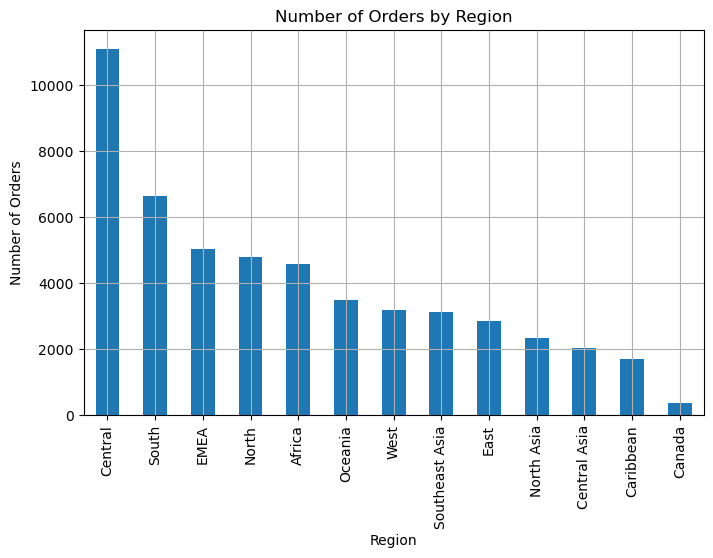

In [49]:
top_regions_orders = df['Region'].value_counts()

plt.figure(figsize=(8,5))
top_regions_orders.plot(kind='bar')
plt.title('Number of Orders by Region')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [60]:
# Считаем количество заказов и сумму продаж по странам
orders_by_country = df['Country'].value_counts()
sales_by_country = df.groupby('Country')['Sales'].sum()

# Создаем датафрейм
country_stats = pd.DataFrame({
    'Orders': orders_by_country,
    'Sales': sales_by_country})

# Считаем средний чек
country_stats['Average Sales per Order'] = country_stats['Sales'] / country_stats['Orders']

# Сортируем по среднему чеку
country_stats_sorted = country_stats.sort_values('Average Sales per Order', ascending=False)

# Выводим топ-10 стран по среднему чеку
display(country_stats_sorted.head(20).sort_values(by='Orders', ascending=False))


,Orders,Sales,Average Sales per Order
Country,,,
China,1880,700562.025,372.639375
India,1555,589650.105,379.196209
Japan,250,100787.517,403.150068
Malaysia,176,61362.210,348.648920
Bangladesh,163,78256.470,480.101043
Belgium,147,49226.700,334.875510
Afghanistan,55,21673.320,394.060364
Cambodia,45,17476.020,388.356000
Uruguay,24,9712.544,404.689333


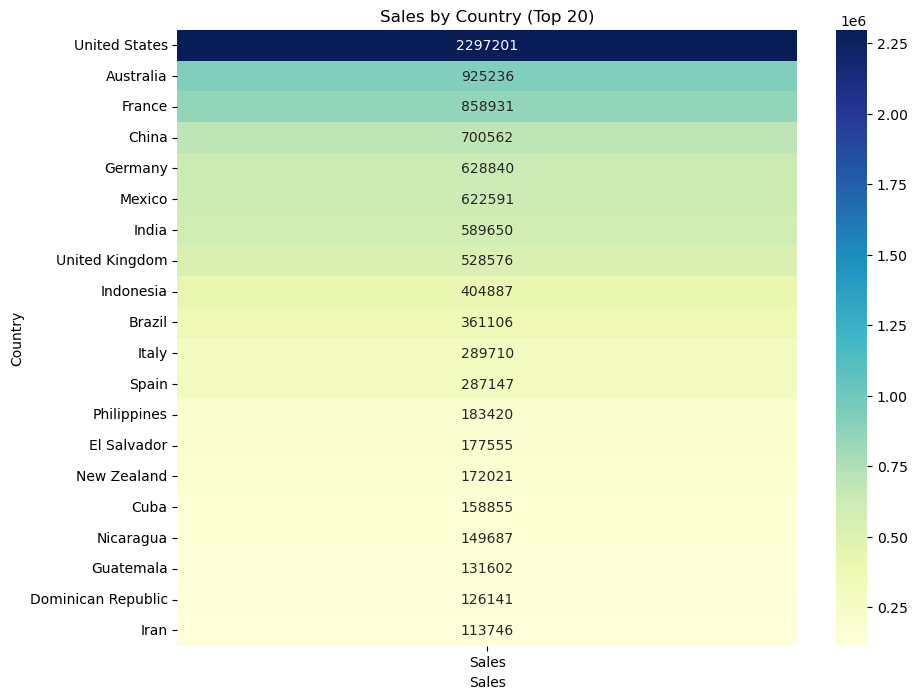

In [62]:
sales_sorted = sales_by_country.sort_values(ascending=False).head(20)

#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(sales_sorted), annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales by Country (Top 20)')
plt.ylabel('Country')
plt.xlabel('Sales')
plt.show()


Географический анализ показал, что основная выручка сосредоточена в США, с заметным вкладом Австралии, Франции, Китая и Германии. Средний чек выше всего в Японии, Индии и Китае, что указывает на возможность увеличения продаж в этих странах за счёт стимулирования повторных покупок.

# Advanced Visualizations

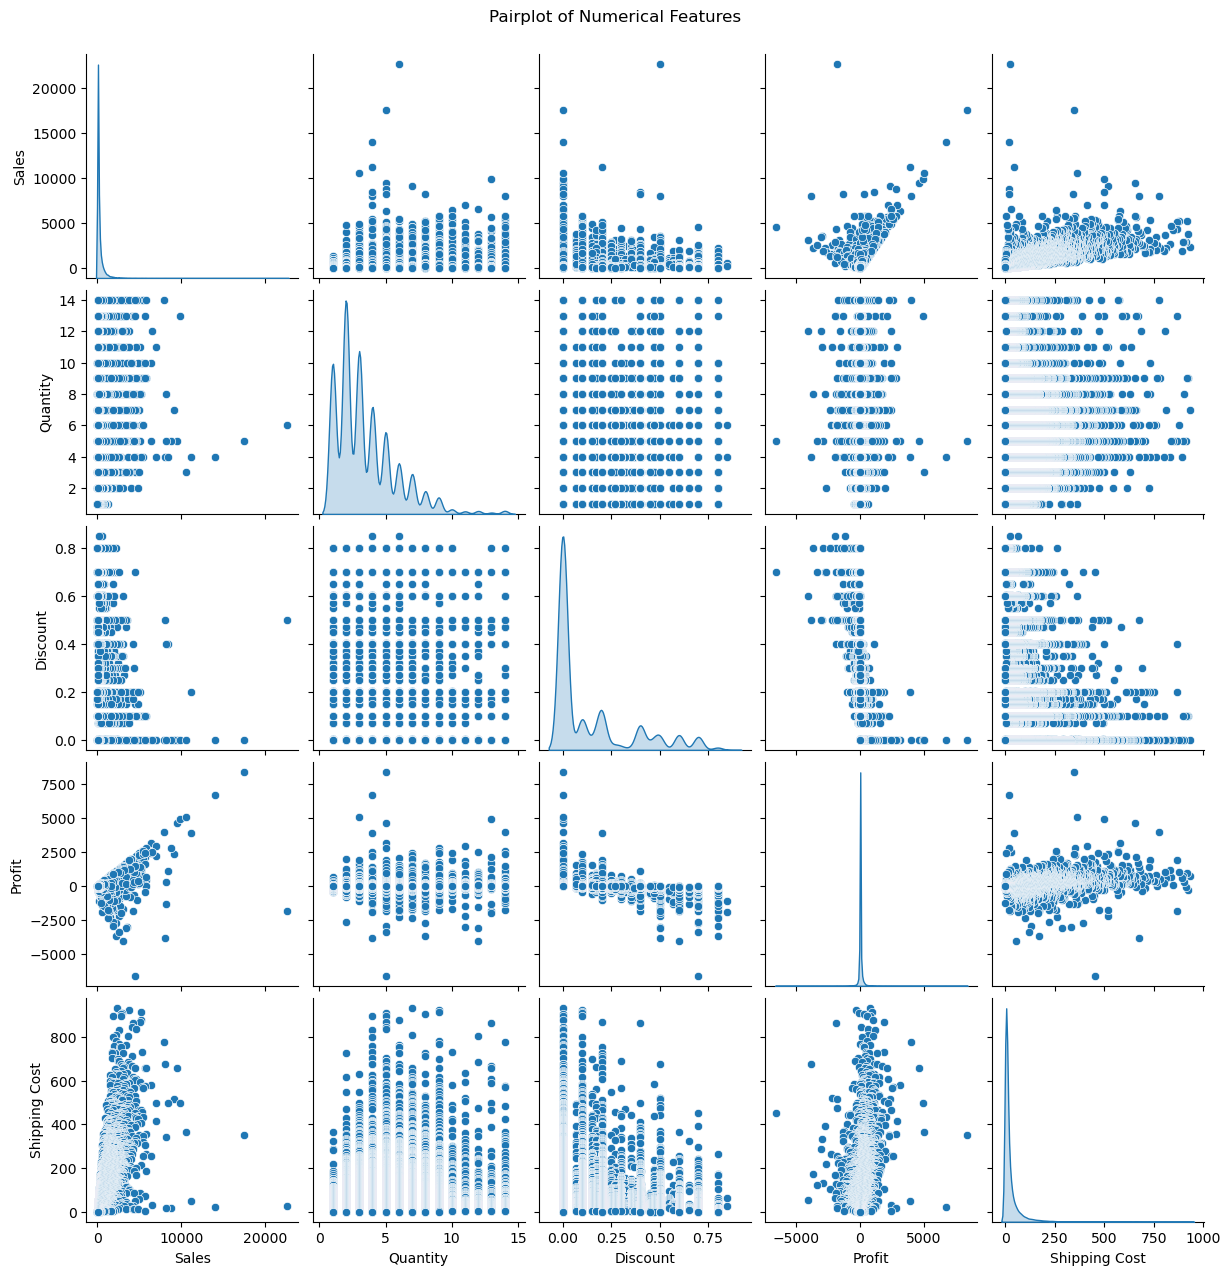

In [64]:
# Выберем числовые колонки
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Строим pairplot
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


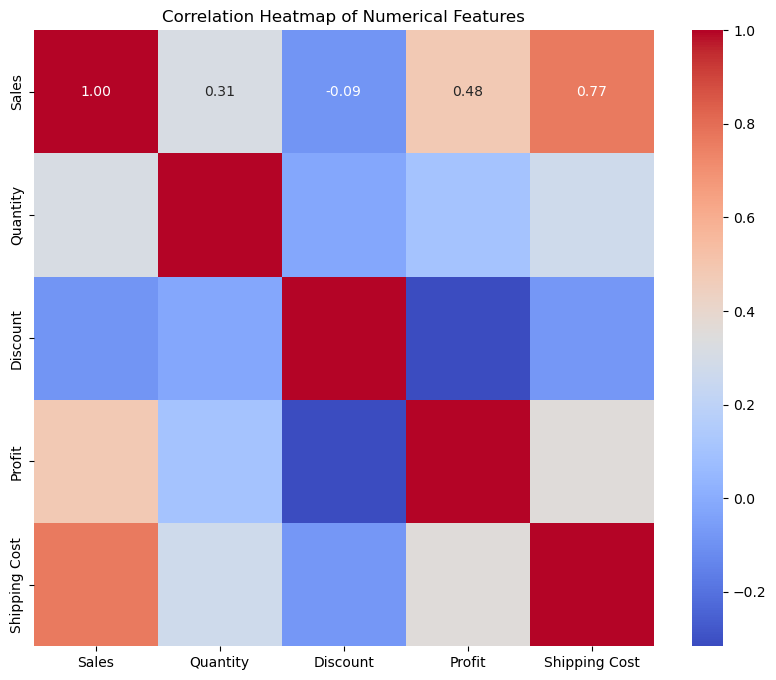

In [65]:
# Корреляционная матрица
corr = df[num_cols].corr()

# Тепловая карта
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


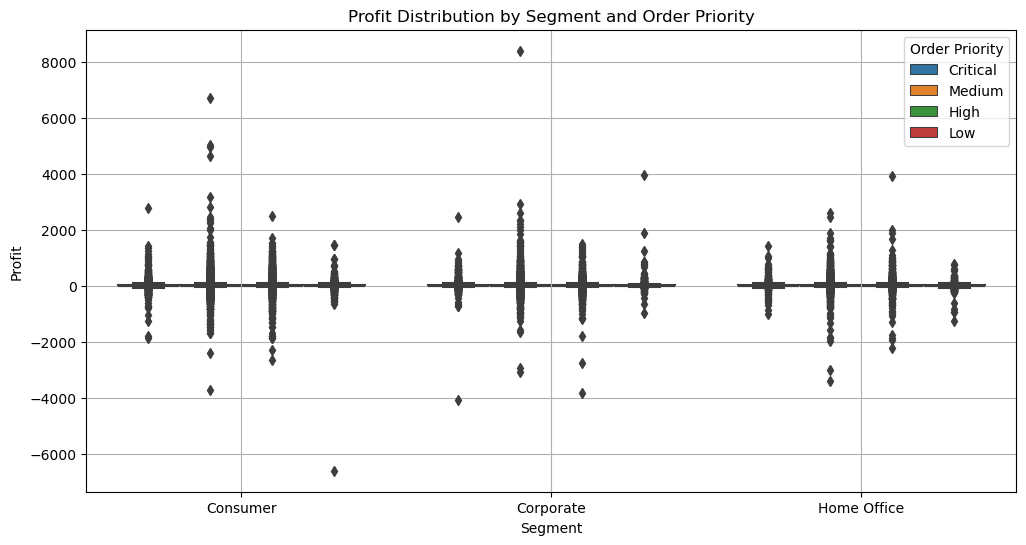

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Segment', y='Profit', hue='Order Priority', data=df)
plt.title('Profit Distribution by Segment and Order Priority')
plt.grid(True)
plt.show()


Advanced Visualizations подтвердили предыдущие выводы: скидки негативно влияют на прибыль, продажи сопровождаются высокими затратами на доставку, а приоритет заказа не оказывает большого влияния на прибыльность. Основные различия в прибыли объясняются сегментами клиентов.



# Финальный вывод

1. 🧹 Univariate Analysis (Анализ отдельных переменных)
Данные о продажах и прибыли очень скошены вправо (много маленьких значений, несколько очень больших).

Skewness:

Profit: 4.15 (сильная положительная асимметрия)

Sales: 8.13 (очень сильная асимметрия)

Kurtosis:

Profit: 291.4 (много выбросов)

Sales: 176.7 (много выбросов)

Вывод: Распределения продаж и прибыли не нормальные. Есть экстремальные выбросы, требующие аккуратной обработки.

2. 🔗 Bivariate Analysis (Анализ пар переменных)
Discount vs Profit: слабая отрицательная корреляция (-0.32).
➔ Чем выше скидка, тем чаще заказ убыточный.

Segment vs Profit: разницы в средней прибыли по сегментам почти нет, но Consumer сегмент имеет самый высокий разброс.

Order Priority vs Profit: приоритет заказа практически не влияет на уровень прибыли.

Вывод: Скидки наносят значительный ущерб прибыли. Клиентский сегмент влияет на разброс доходности.

3. 🏷 Categorical Analysis (Анализ категориальных признаков)
Большинство заказов приходится на:

Ship Mode: Standard Class (~60%)

Segment: Consumer (~52%)

Market: APAC и Central

В колонках City и Product Name очень много редких категорий (меньше 1%).

В некоторых регионах и рынках наблюдается сильная диспропорция количества заказов.

Вывод: Категориальные признаки несут важную информацию. Возможно стоит объединить редкие категории для упрощения модели.

4. 🕰 Time Series Analysis (Анализ по времени)
Общий тренд: постоянный рост количества заказов и продаж с 2011 по 2014 годы.

Наблюдается сезонность: осенью продажи обычно выше.

3-месячное скользящее среднее подчёркивает тренд роста и сезонные колебания.

Вывод: Данные подвержены сезонности. Нужно учитывать сезонные факторы при моделировании.

5. 🌍 Geographical Analysis (Географический анализ)
Основной рынок: США (>45% всех продаж).

Средний чек выше в странах: Япония, Индия, Китай.

Другие перспективные рынки: Австралия, Франция, Германия.

Вывод: Продажи концентрируются в США, но стоит рассмотреть развитие в других странах с высоким средним чеком.

6. 🎨 Advanced Visualizations (Продвинутые визуализации)
Pairplot и Correlation Heatmap подтвердили слабую корреляцию Discount- Profit (-0.09).

Boxplot показал, что сегмент клиента оказывает большее влияние на разброс прибыли, чем приоритет заказа.

📌 Ключевые выводы:
Скидки критично влияют на прибыль (особенно скидки выше 20%).

Продажи и прибыль сильно не нормальны, имеют много выбросов.

Рост продаж наблюдается со временем с выраженной сезонностью.

США — основной драйвер продаж, но страны с высоким средним чеком требуют внимания.

Приоритет заказа почти не влияет на прибыль, сегмент — влияет.